# Effort and cost Estimation in Agile Software Development

In [ ]:
#@title Effort Estimation on Maxwell
import math
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.metrics import classification_report

#data_read = pd.read_csv('/content/drive/MyDrive/Btp/Ultra/special work/datasets/maxwell.csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_read = pd.read_csv('/content/drive/MyDrive/Btp/Ultra/special work/datasets/Finnish407.csv')

In [ ]:
data_read.head()

,Case_Number,Project_tech_ID,YK,Project_name,Business_names,Protype_names,Hardware_names,Duration,Size_ep99_proj,Worksup,...,OutTot,OutFP,IntTot,IntFP,EntTot,EntFP,AlgTot,AlgFP,AllTot,AllFP_ep20
0,1,3474,H,PN100,W,N,M,7,290,2466,...,16,75,9,64,5,22,0,0,66,280
1,2,4144,H,PN101,W,N,M,6,328,2210,...,24,114,11,83,5,27,0,0,68,317
2,3,4254,H,PN102,W,N,M,3,150,531,...,6,25,9,51,5,22,0,0,34,139
3,4,4304,H,PN103,W,N,M,6,74,341,...,8,27,6,36,1,5,0,0,17,72
4,5,1346,C,PN104,C,N,C,8,149,682,...,0,0,2,10,1,5,0,0,18,57


In [ ]:
#@title Defining Category 1 and Category 2


features = [	'Duration' ,	'Size_ep99_proj',	'AllTot']
#features = ['Actual_Cost',	'Vi',	'D',	'V',	'Sprint_Size',	'Work_days',	'Act_Time']



Cat_1 = data_read[features]
Cat_2 = data_read['AllFP_ep20']

In [ ]:
#For Debugging Purpose
 
##Cat_1=data_read.drop(['Actual_Cost'],axis=1).values
#Cat_1=data_read(db_a).values
#Cat_1=data_read['Effort',	'Vi',	'D',	'V',	'Sprint_Size',	'Work_days',	'Team_Salary',	'Act_Time',	'Est_time'].values
##Cat_2=data_read['Actual_Cost'].values



#@title Describing Categorical Data 
Cat_1.describe()


,Duration,Size_ep99_proj,AllTot
count,407.000000,407.000000,407.000000
mean,13.796069,605.968059,108.673219
std,10.532155,623.892916,112.068588
min,0.000000,6.000000,0.000000
25%,6.000000,204.000000,39.000000
50%,12.000000,370.000000,70.000000
75%,19.000000,767.000000,143.500000
max,60.000000,3804.000000,873.000000


In [ ]:
#For debugging purpose
#print(Cat_1)

In [ ]:
#@title Describe the raw Data of splitted trained set from the dataframe
display(Cat_1)

,Duration,Size_ep99_proj,AllTot
0,7,290,66
1,6,328,68
2,3,150,34
3,6,74,17
4,8,149,18
...,...,...,...
402,14,546,80
403,9,200,53
404,11,586,100
405,8,710,152


In [ ]:
print('The overall number of projects are: ',len(Cat_2))

The overall number of projects are:  407


In [ ]:
display(Cat_2)

0       280
1       317
2       139
3        72
4        57
       ... 
402     450
403     169
404     518
405     620
406    1996
Name: AllFP_ep20, Length: 407, dtype: int64

In [ ]:


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2,test_size=0.20, random_state=0)
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)
ml.predict(x_test)
y_pred1 = ml.predict(x_test)

ypredx=len(x_test)
## For Debugging Purpose


# print(len(y_pred1))
# print('xtrain',len(x_train))
# print('xtest',len(x_test))

In [ ]:
import math
print(y_test)


261     123
122     444
60      694
232     845
135    1398
       ... 
20      199
378     107
14      104
396     146
206     114
Name: AllFP_ep20, Length: 82, dtype: int64


In [ ]:
print(y_pred1)

[ 166.56058938  460.68915507  647.39607307 2128.97741328 1359.87794678
 1011.83408334  562.82315027  646.30810468  151.57087212 1380.4257118
  204.82402907  307.9681534   668.35374082  271.53912694 1726.07914025
  112.80650428  816.06925639  121.68847803  875.50884122  302.66276568
   91.16311769  167.01039269  547.50077533  378.98781277   71.66628757
  905.27286194   26.31243535  200.08150936  181.40877721  181.51836908
  165.72598621   85.12832791 1123.67557686   84.95271526   80.94826696
  386.88139958 2114.200341    979.06572148  105.80996917  524.08113272
 3921.36897219  403.0179754  1704.37360223  236.09175215  297.7524969
  275.23652911  855.01831549  834.4437239   390.31552554   69.38217045
  154.35550813  101.46704585 1339.5037609   110.74728882   75.15674761
  263.53155751  514.01609697  494.00302078  239.96783056  140.34365989
 1779.73158376  222.41970611  422.04794788  812.50553279  136.88472816
   69.35247798   81.81695336 1886.41360858   37.2653575   212.00220458
   94.28

In [ ]:
ml.predict(x_train)
x_train_pred_lr= ml.predict(x_train)

In [ ]:
from sklearn.metrics import r2_score


import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math




print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred1))

diff=np.absolute(y_test-y_pred1)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#linear effort

The r Score on the predictrd trained Set: 0.88
MMRE inf
MdMRE 0.16398100263424986
PRED 25% 71.95121951219512


In [ ]:

#   diff=np.absolute(y_test-y_pred1)
#   MRE=diff/y_test
#   MMRE=np.mean(MRE)

# print('MMRE :',MMRE)

Text(0.5, 1.0, 'Effort Actual vs Predicted Linear Regresssion')

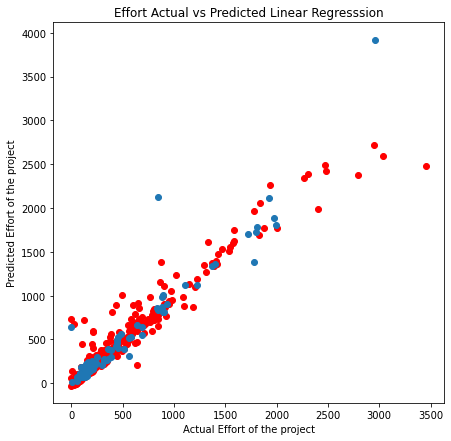

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_train, x_train_pred_lr ,label='Train Data',color='red' )
plt.scatter(y_test, y_pred1)


#plt.scatter()
plt.xlabel('Actual Effort of the project')
plt.ylabel('Predicted Effort of the project')
plt.title('Effort Actual vs Predicted Linear Regresssion')




In [ ]:
##Debugging pur   
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})

# Now calculating Diffrence between actual and predicted Values

In [ ]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred1,'Difference':y_test-y_pred1})

#print(pred_y_diff.dtypes)
#
#pred_y_diff= pd.DataFrame(range(3), columns=['y_pred1'])
#pred_y_diff.y_pred1 = pred_y_diff.y_pred1.astype(float)


pred_y_diff[0:21]


,Actual Values of Cost,Predicted Cost,Difference
261,123,166.560589,-43.560589
122,444,460.689155,-16.689155
60,694,647.396073,46.603927
232,845,2128.977413,-1283.977413
135,1398,1359.877947,38.122053
300,890,1011.834083,-121.834083
229,482,562.823150,-80.823150
239,0,646.308105,-646.308105
225,174,151.570872,22.429128
102,1779,1380.425712,398.574288


In [ ]:
#arr = pred_y_diff.to_numpy()
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})
arr2 =pd.DataFrame({'Difference':y_test-y_pred1})

In [ ]:

print(arr)

     Actual  Cost
261           123
122           444
60            694
232           845
135          1398
..            ...
20            199
378           107
14            104
396           146
206           114

[82 rows x 1 columns]


In [ ]:
print(np.absolute(arr2))

      Difference
261    43.560589
122    16.689155
60     46.603927
232  1283.977413
135    38.122053
..           ...
20     51.993719
378    40.929613
14     32.795348
396    39.229749
206    37.218634

[82 rows x 1 columns]


In [ ]:
arr22= [];
arr11=[];
i=1
k=1
for i in arr:
  xx= arr[i]
  arr22.append(xx)
for k in arr1:
  yy= arr1[k]
  arr11.append(yy)

In [ ]:
#print(arr22[0][0])
#print(arr11[0][0])
print(len(arr11))
Diff=[];
i=0
#for i in range(0,5):
   # vv=arr22[0][i]-arr11[0][i]
#    Diff.append(vv)
#    print(vv)

1


In [ ]:
#pred_y_diff = pd.DataFrame({'Actual  Cost':y_test,'Predicted Cost':y_pred1,'Difference':y_test-y_pred1,'MMRE':1/6((y_test-y_pred1)/y_test) })

In [ ]:
# @title KNeiboursRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#print('x_train length :',len(x_train))
x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)
#print(len(y_pred1))
#print('x_train length:',len(x_train))
#print('x_test length:',len(x_test))

neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(x_train,y_train)
y_pred=neigh.predict(x_test) 

#print(classification_report(y_test,y_pred))

#predict =neigh.predict(y_pred)
#print(neigh.score(y_test, y_pred))

import numpy as np
from sklearn.metrics import mean_absolute_error
#

# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred))

diff=np.absolute(y_test-y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)


#KNN EFFORT

The r Score on the predictrd trained Set: 0.82
MMRE inf
MdMRE 0.07637690216852173
PRED 25% 81.70731707317073


In [ ]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred,'MRE':(y_test-y_pred)/y_test})


pred_mre[0:21]

,Actual Values of Cost,Predicted Cost,MRE
261,123,230.000000,-0.869919
122,444,471.000000,-0.060811
60,694,636.666667,0.082613
232,845,2925.000000,-2.461538
135,1398,1219.333333,0.127802
300,890,910.666667,-0.023221
229,482,446.666667,0.073306
239,0,193.666667,-inf
225,174,170.666667,0.019157
102,1779,1552.666667,0.127225


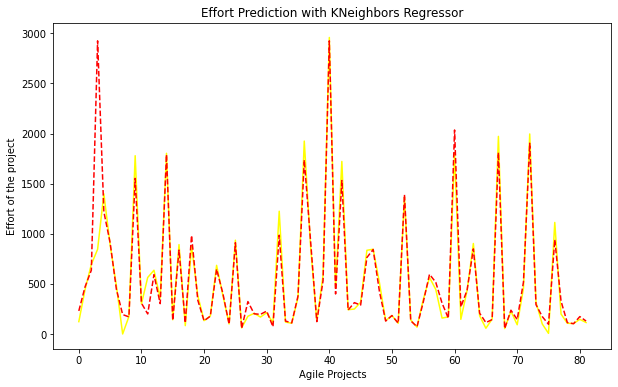

In [ ]:
 #plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(x_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred , label='Predicted values ' , color='red' , linestyle ='--')

plt.xlabel('Agile Projects')
plt.ylabel('Effort of the project')
plt.title('Effort Prediction with KNeighbors Regressor')
#plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show()

----------------------------

In [ ]:
# #@title CALCULATING THE MMRE

# #MAKING THE VALUES ABSOLUTE 
# xyy=pred_mre.MRE.abs()
# Raw_mean = xyy.sum()/len(pred_mre) #Total Projects in the Dataset are 21
# #print('MMRE :',Raw_mean)

# # percentage MMRE 
# print(Raw_mean)
# #print('Percentage MMRE :',Raw_mean*100)

Decision Tree Implementation

## Decision Tree Implementation 

In [ ]:
data_read.head()

,Case_Number,Project_tech_ID,YK,Project_name,Business_names,Protype_names,Hardware_names,Duration,Size_ep99_proj,Worksup,...,OutTot,OutFP,IntTot,IntFP,EntTot,EntFP,AlgTot,AlgFP,AllTot,AllFP_ep20
0,1,3474,H,PN100,W,N,M,7,290,2466,...,16,75,9,64,5,22,0,0,66,280
1,2,4144,H,PN101,W,N,M,6,328,2210,...,24,114,11,83,5,27,0,0,68,317
2,3,4254,H,PN102,W,N,M,3,150,531,...,6,25,9,51,5,22,0,0,34,139
3,4,4304,H,PN103,W,N,M,6,74,341,...,8,27,6,36,1,5,0,0,17,72
4,5,1346,C,PN104,C,N,C,8,149,682,...,0,0,2,10,1,5,0,0,18,57


In [ ]:
#Now to Prepare the Input and Output Features
X= data_read.drop(['Effort'],axis=1)
X.shape

KeyError: ignored

In [ ]:
#Splitting the dataset into Trainingfset and test set

#Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
#Creating and Fitting the model
regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

In [ ]:
#The Coeffitient of Detern=mination 
print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

In [ ]:
# For the training model EVALUATION
from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [ ]:
#prediction on the training Dataset
y_train_pred = regressor1.predict(X_train)



In [ ]:

# The r_sq
print('The r_sq  is: %.2f'% r2_score(y_train,y_train_pred))

In [ ]:
#prediction on testing the data
y_test_pred_dt = regressor1.predict(X_test)
print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_dt))
print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_dt))
xv= math.sqrt(mean_squared_error(y_test,y_test_pred_dt))
print("Root Mean Squared Error::",xv)

In [ ]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))



In [ ]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_dt , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Effort')
plt.title('Effort Prediction witn Decision Tree Regression')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show

In [ ]:
pred_mre = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'MRE':(y_test-y_test_pred_dt)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

CALCULATING MRE MMRE MdMRE and PRED 25

In [ ]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))

diff=np.absolute(y_test-y_test_pred_dt)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#DT EFFORT

In [ ]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'Difference':y_test-y_test_pred_dt})

pred_y_diff[0:21]

In [ ]:
#@title Random Forest Implementation
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators=30, random_state=30)

In [ ]:
#Fitting the  model 
LL_rf = model2.fit(X_train,y_train)


In [ ]:
#prediction on testing the data
y_test_pred_rf = model2.predict(X_test)

In [ ]:
#Training Model Evaluation


print('The Model Score on the predictrd training Set: %.2f'% LL_rf.score(X_train,y_train))
print('r2 Score ', r2_score(y_test,y_test_pred_rf))

In [ ]:
print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_rf))
print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_rf))
xv= math.sqrt(mean_squared_error(y_test,y_test_pred_rf))
print("Root Mean Squared Error::",xv)

In [ ]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_rf , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Effort')
plt.title('Effort Prediction with Random Forest')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

In [ ]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred_rf,'MRE':(y_test-y_test_pred_rf)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

In [ ]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_rf))

diff=np.absolute(y_test-y_test_pred_rf)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)



In [ ]:
#@title CALCULATING THE MMRE

#MAKING THE VALUES ABSOLUTE 
xyy=pred_mre.MRE.abs()
Raw_mean = xyy.sum()/ypredx #Total Projects in the Dataset are 21
print('MMRE :',Raw_mean)

MMRE_RF = Raw_mean*100
# percentage MMRE 
###print(' MMRE in Percentage :',Raw_mean*100,'%')

# Support Vector Machine

In [ ]:
#@title Support Vector
#import warnings
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import GridSearchCV


# Categorical To continious 
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)


svm = SVC(kernel="linear",C=1)
svm.fit(X_train,y_train)

#clf = svm.SVC()
#clf.fit(Cat_1, Cat_2)

y_pred_svm=svm.predict(X_test)
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#
print("Mean Absolute error:::",np.sqrt(mean_absolute_error(y_test,y_pred_svm)))

print("Mean Squared Error::",mean_squared_error(y_test,y_pred_svm))
xv= math.sqrt(mean_squared_error(y_test,y_pred_svm))
print("Root Mean Squared Error::",xv)


In [ ]:
#prediction on testing the data
#y_test_pred_svm = y_pred111.predict(y_test,y_test_pred_svm)

In [ ]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_pred_svm,'Difference':y_test-y_pred_svm})

pred_y_diff[0:21]

In [ ]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(x_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred_svm , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()

plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)
plt.show()

In [ ]:
#@title Decision tree
# from sklearn import svm
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# data_read = pd.read_csv('Zia_upd22.csv')

# X = data_read.iloc[:,0:8].values
# y = data_read.iloc[:,:-1].values
# regressor = DecisionTreeRegressor(random_state =0)
# regressor.fit(X, y)




In [ ]:
# # @title Let Us calculate Estimated Cost With Raw Data
# x=regressor.predict([[154,4.2,0.77,2.7,12,22,310000,63]])
# print("Estimated Cost:",x[0]*100000)



In [ ]:
# #@title Decision Tree Regression 
# from sklearn.model_selection import train_test_split
# from sklearn import svm
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# #data_read = pd.read_csv('Zia_upd22.csv')

# #X = data_read.iloc[:,1:8].values
# #y = data_read.iloc[:,-1].values
# #X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20 )



In [ ]:
# X.shape

In [ ]:
# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [ ]:
# regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

#coefficient of determination 
# print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

In [ ]:
# For the training model EVALUATION
# from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [ ]:
#Prediction on the training dataset
y_train_pred= regressor1.predict(X_train)
#y_train= regressor1.predict(X_train)

In [ ]:
# The r_sq
# print('The r_sq ,is :',r2_score(y_train,y_train_pred))

In [ ]:
# The MAE
print('The MAE is :  ', mean_absolute_error(y_train,y_train_pred))

In [ ]:
  # MSE 
  print('The MSE is :  ', mean_squared_error(y_train,y_train_pred))

In [ ]:
# RMSE 
print('The RMSE is :', np.sqrt(mean_squared_error(y_train,y_train_pred)))

In [ ]:
#Prediction on the testing Data
y_test_pred = regressor1.predict(X_test)
y_test = regressor1.predict(X_test)

Now Calculating r_score 

In [ ]:
# The r_sq
print('The r_sq y_test , y_test_pred is: %.2f'% r2_score(y_test,y_test_pred))

In [ ]:
# # plotting the observed and predicted values 


# # Setting the boundaries and parameters

# plt.rcParams['figure.figsize'] = (10,6)
# x_ax =range(len(X_test))

# #plotting 
# plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
# plt.plot(x_ax,y_test_pred , label='Predicted values ' , color='red' , linestyle ='--')
# plt.grid()
# plt.ylabel('dcscfvfdscd')
# plt.xlabel('fffdcdcscfvfdscd')
# plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

In [ ]:
from yellowbrick.regressor import PredictionError 
visualizer = PredictionError(regressor1)
visualizer.fit(X_train, y_train)
visualizer.fit(X_test,y_test)
visualizer.score(X_test,y_test)
visualizer.poof()

In [ ]:
# The MAE
print('The MAE is :  ', mean_absolute_error(y_test,y_test_pred ))

In [ ]:
#pip install yellowbrick

In [ ]:
# Residuals plot 
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor1)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

In [ ]:
# testing the Model Evaluation



In [ ]:
# MAE 
print('The MAE is :%.2f'% mean_absolute_error(y_test,y_test_pred))

In [ ]:
# The MSE 
print('The MSE is : %.2f'% mean_squared_error(y_test,y_test_pred))

In [ ]:
print('The RMSE is : %.2f'% np.sqrt(mean_squared_error(y_test,y_test_pred)))

In [ ]:
# k-fold cross-validation
from sklearn.model_selection import cross_val_score

In [ ]:
#On the training Dataset
from sklearn.model_selection import cross_val_score
score_train = cross_val_score(regressor1,X_train,y_train,scoring = 'neg_mean_squared_error' , cv= 10)

In [ ]:
score_train

In [ ]:
score_train = np.mean(score_train)
print(score_train)

In [ ]:
# To make make it Positivme 
from numpy import absolute
score_train = absolute(score_train)
score_train

In [ ]:
# CV on thee testing data 
score_test = cross_val_score(regressor1, X_test, y_test, scoring ='neg_mean_squared_error' , cv= 5)

In [ ]:
print(score_test)

In [ ]:
#The Mean sCORE 
score_test = np.mean(score_test)
score_test

In [ ]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred,'Difference':y_test-y_test_pred})

pred_y_diff[0:21]

# Random Forest Regression

In [ ]:
# Let us first import The

